# Task 2 and 3 - Shor's Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor
import warnings
warnings.filterwarnings('ignore')

In [2]:
N = 21
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
shor = Shor(quantum_instance=quantum_instance)
result = shor.factor(N)
print(f"The list of factors of {N} as computed by the Shor's algorithm is {result.factors[0]}.")

The list of factors of 21 as computed by the Shor's algorithm is [3, 7].


In general, Shor's algorithm as implemented in Qiskit requires $4n + 2$ qubits, where $n = \lceil\log_2(N))\rceil$ is the number of bits needed to represent $N$ in binary. 

A single complex number $a + bi$ requires 16 bytes of memory to store, since $a, b$ are both `float` types (8 bytes each). Now, the state vector for an $n$-qubit register is described by $2^n$ complex entries, and thus requires $2^n\times 16$ bytes to store. 


If we pick $N = 91$, then this requires 30 qubits to run Shor's algorithm. Consequently, the memory required to store the complex state vector for our quantum register is $2^{30}\times 16$ bytes $\approx$ 17 GB. Unfortunately, this is beyond the capacity for many laptops which have 8-16 GB of RAM.

In [3]:
N_list = np.arange(10, 512)

def memory(N):
    n = np.ceil(np.log2(N))
    dim = 2**(4*n + 2)
    
    return 16 * dim

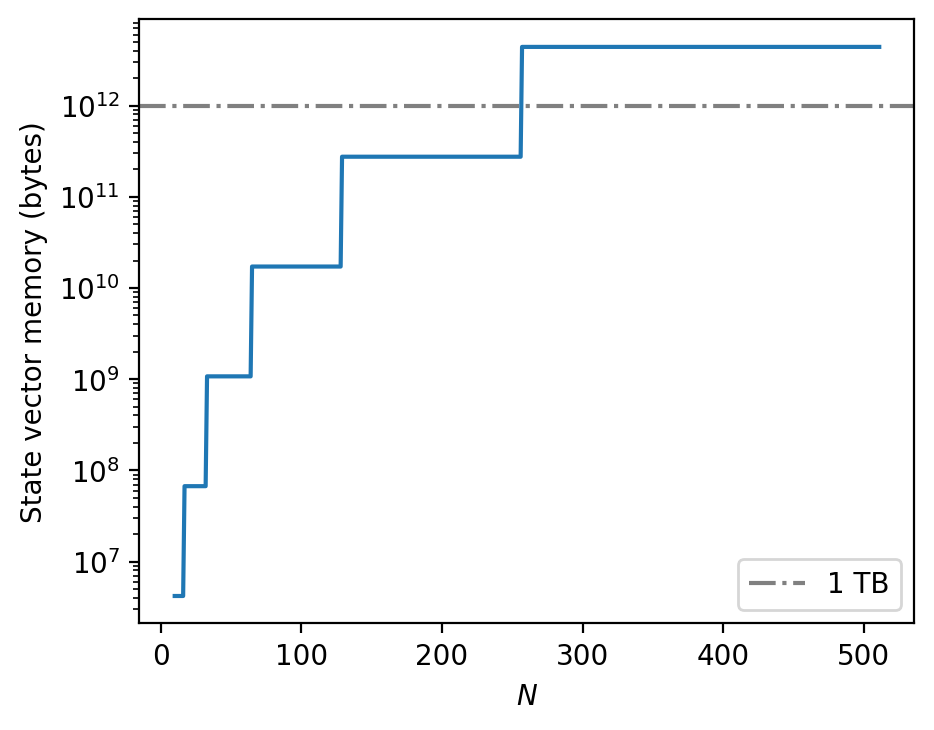

In [4]:
plt.figure(figsize=(5,4), dpi=200)
plt.semilogy(N_list, memory(N_list))
plt.xlabel("$N$"); plt.ylabel("State vector memory (bytes)")
plt.axhline(1e12, c="grey", linestyle='-.', label="1 TB")
plt.legend(loc="lower right")
plt.show()